# Customer Segmentation Using K Means Clustering

 
  Customer Segmentation is a popular application of unsupervised learning. Using
     clustering, identify segments of customers to target the potential user base.  They divide
     customers into groups according to common characteristics  like gender, age, interests,
     and spending habits so they can market to each group  effectively.  
     Use K-means clustering and also visualize the gender and age distributions. Then
     analyze their annual incomes and spending scores.  

In [41]:
                    #version
#python           : 3.8.3.final.0
#pandas           : 1.0.5
#numpy            : 1.18.5
#seaborn          : 0.10.1
#matplotlib       : 3.2.2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

In [42]:
df=pd.read_csv('Mall_Customers.csv') 

In [43]:
df.info()  #there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
#Missing values computation
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
df.head(10)#Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


For the descriptive statistcs, we'll get mean, standard deviation, median and variance. If the variable is not numeric, we'll get the counts in each category.

In [46]:

def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())


In [47]:
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


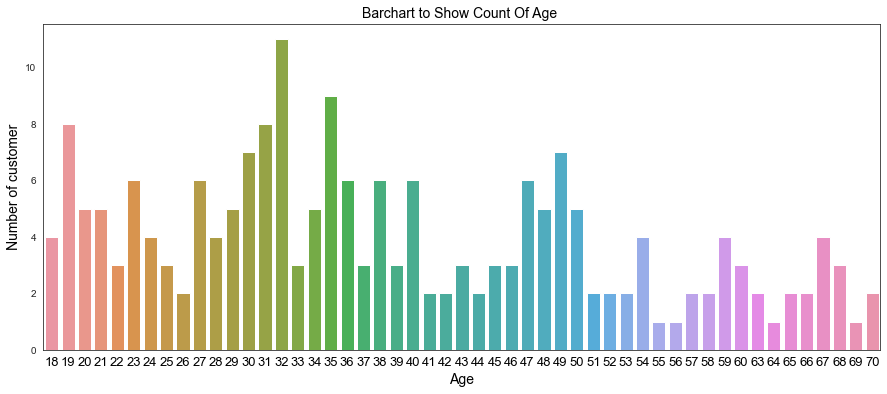

In [48]:
fig = plt.figure(figsize=(15,6))
Age=df.Age.value_counts()
plt.title("Barchart to Show Count Of Age ",fontsize=14,color="black")
plt.ylabel("Number of customer",fontsize=14,color='black')
plt.xlabel("Age",fontsize=14,color='black')
plt.xticks(fontsize=13,color='black')
sns.barplot(x=Age.index, y=Age.values, data=df)
plt.show()

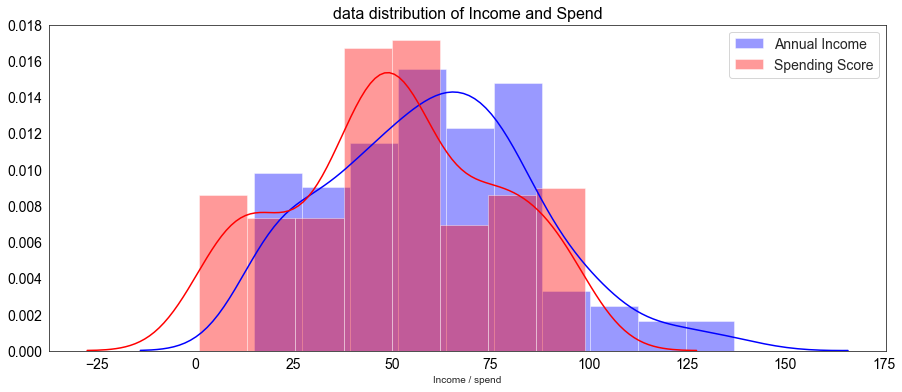

In [49]:
#Visualizing the data - displot
plt.figure(figsize=(15,6))
plot_income = sns.distplot(df["Annual Income (k$)"],color='blue',label="Annual Income")
plot_spend = sns.distplot(df["Spending Score (1-100)"],color='red',label="Spending Score")
plt.title("data distribution of Income and Spend",fontsize=16,color='black')
plt.xticks(fontsize=14,color='black')
plt.yticks(fontsize=14,color='black')
plt.xlabel('Income / spend')
plt.legend(fontsize=14)
plt.show()

        Female  Male
Gender     112    88


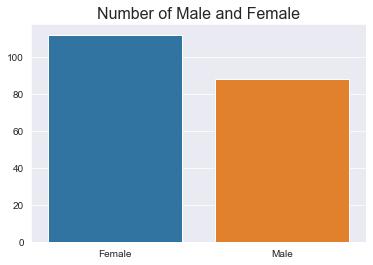

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Gender,100.0,12.0,100.0,144.0


In [50]:
Gender=df.Gender.value_counts()
print(pd.DataFrame([Gender]))
sns.set_style("darkgrid")
plt.title("Number of Male and Female",size=16)
sns.barplot(x=Gender.index,y=Gender.values)
plt.show()
statistics(Gender)

<Figure size 1080x432 with 0 Axes>

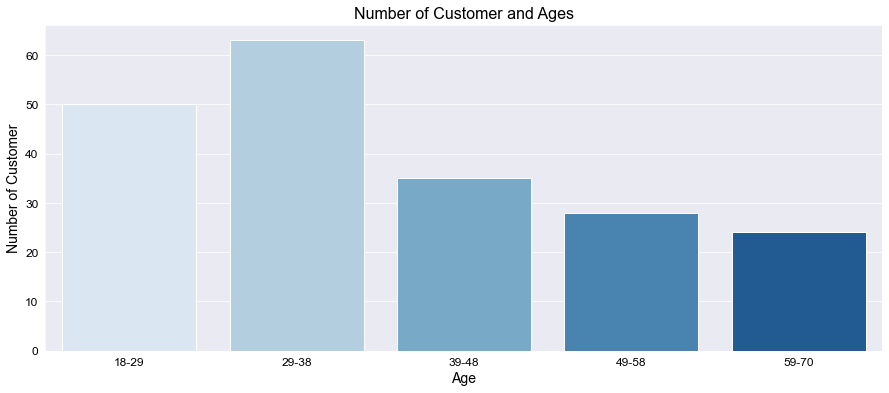

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


In [51]:
plt.figure(figsize=(15,6))
Age=df.Age
age18_28=Age[(Age>=18)&(Age<=28)]
age29_38=Age[(Age>=29)&(Age<=38)]
age39_48=Age[(Age>=39)&(Age<=48)]
age49_58=Age[(Age>=49)&(Age<=58)]
age59_70=Age[(Age>=59)&(Age<=70)]
x=['18-29','29-38','39-48','49-58','59-70']
y=[len(age18_28.values),len(age29_38.values),len(age39_48.values),len(age49_58.values),len(age59_70.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y,palette="Blues")
plt.title("Number of Customer and Ages",fontsize=16,color='black')
plt.xlabel("Age",fontsize=14,color='black')
plt.ylabel("Number of Customer",fontsize=14,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12,color='black')
plt.show()
statistics(Age)

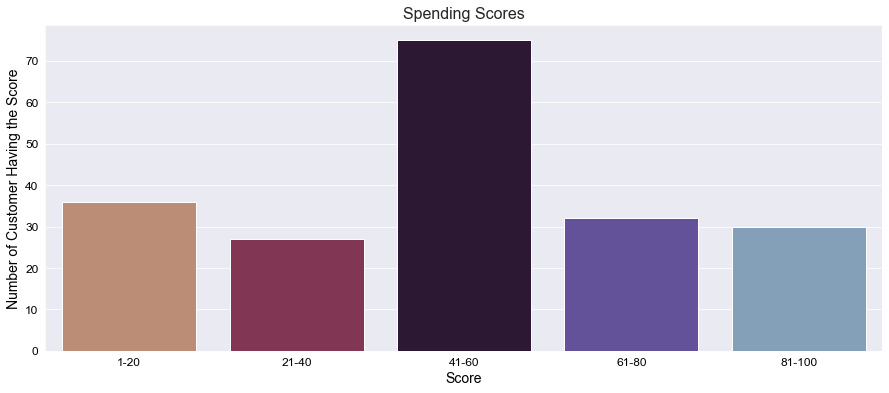

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


In [52]:
SpendScore=df['Spending Score (1-100)']

ss1_20 = SpendScore[(SpendScore>= 1) & (SpendScore<= 20)]
ss21_40 = SpendScore[(SpendScore>= 21) & (SpendScore<= 40)]
ss41_60 = SpendScore[(SpendScore>= 41) & (SpendScore<= 60)]
ss61_80 = SpendScore[(SpendScore>= 61) & (SpendScore <= 80)]
ss81_100 = SpendScore[(SpendScore>= 81) & (SpendScore <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="twilight_r")
plt.title("Spending Scores",size=16)
plt.xlabel("Score",fontsize=14,color='black')
plt.ylabel("Number of Customer Having the Score",fontsize=14,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12,color='black')
plt.show()
score=df['Spending Score (1-100)']
statistics(score)

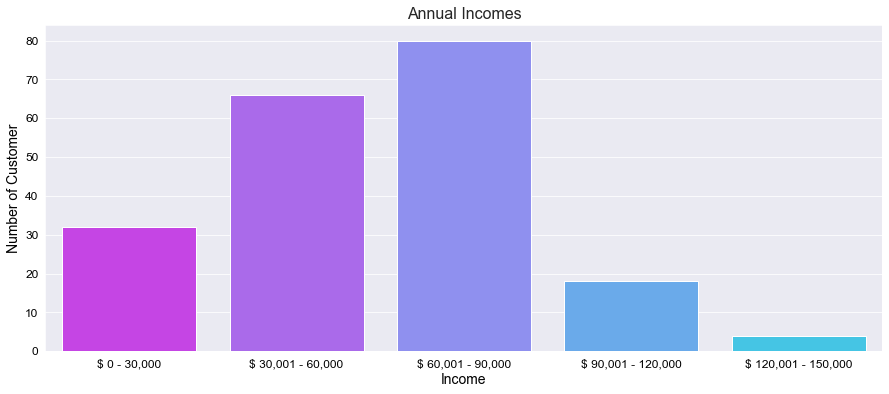

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


In [53]:
ai=df['Annual Income (k$)']
ai0_30 = ai[(ai >= 0) & (ai <= 30)]
ai31_60 = ai[(ai >= 31) & (ai <= 60)]
ai61_90 = ai[(ai >= 61) & (ai <= 90)]
ai91_120 =ai[(ai >= 91) & (ai <= 120)]
ai121_150 =ai[(ai>= 121) & (ai <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="cool_r")
plt.title("Annual Incomes",size=16)
plt.xlabel("Income",fontsize=14,color='black')
plt.ylabel("Number of Customer",fontsize=14,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12,color='black')
plt.show()
Income=df['Annual Income (k$)']
statistics(Income)

### Correlation between parameters

analyze the correlation between the numeric parameters. For that aim, I used the pairplot seaborn function. I want to see whether there is a difference between gender. So,I am going to set the hue parameter to get different colors for points belonging to female or customers.



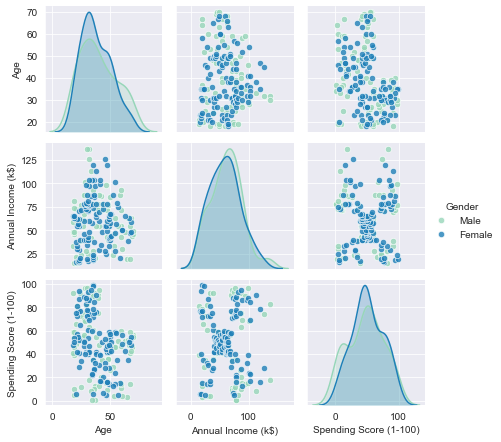

In [54]:
sns.pairplot(df, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 40, "alpha": 0.8});

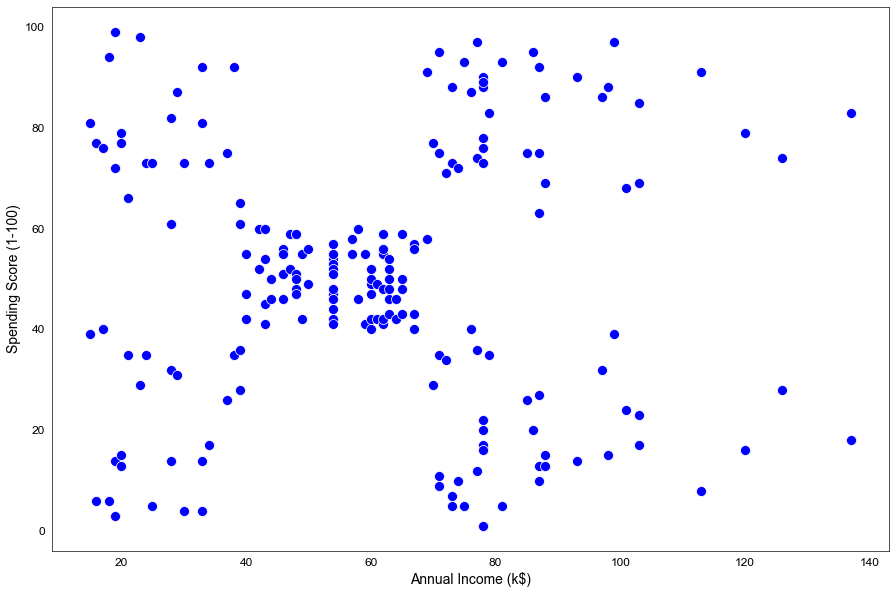

In [55]:
sns.set_style("white")
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],data=df,color ='blue',s=100)
plt.ylabel('Spending Score (1-100)',fontsize=14,color="black")
plt.xlabel("Annual Income (k$)",fontsize=14,color="black")
plt.xticks(fontsize=12,color="black")
plt.yticks(fontsize=12,color="black")
plt.show()


## Elbow Method for optimal value of k in KMeans

In [56]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from scipy.spatial.distance import cdist
inertias = []

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging


for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    inertias.append(kmeans.inertia_)   #inertia:It is the sum of squared distances of samples to their closest cluster center.
   
for i in range(len(inertias)):
    print('k value',str(i+1)+' : '+str(inertias[i]))

k value 1 : 269981.28000000014
k value 2 : 181363.59595959607
k value 3 : 106348.37306211119
k value 4 : 73679.78903948837
k value 5 : 44448.45544793369
k value 6 : 37265.86520484345
k value 7 : 30273.394312070028
k value 8 : 25043.890043290034
k value 9 : 21794.885609098194
k value 10 : 19664.68519600554


### Visualizing the ELBOW method to get the optimal value of K 

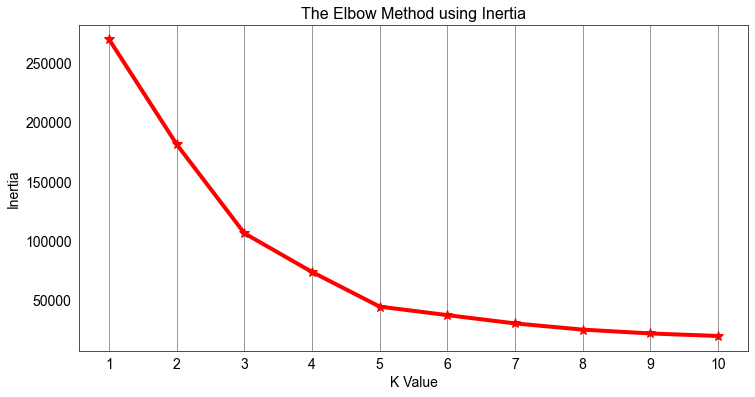

In [57]:
plt.figure(figsize=(12,6))    
plt.grid(which="both",color="black",axis='x',alpha=0.5)
plt.plot(range(1,11),inertias, linewidth=4, color="red", marker ="*", markersize=10)
plt.title("The Elbow Method using Inertia",family="Arial",fontsize=16,color="black")
plt.xlabel("K Value",family="Arial",fontsize=14,color="black")
plt.xticks(np.arange(1,11,1),fontsize=14,color="black")
plt.yticks(fontsize=14,color="black")
plt.ylabel("Inertia",family="Arial",fontsize=14,color="black")

plt.show()


How does k-means clustering works? The main idea is to select k centers, one for each cluster. There are several ways to initialize those centers. We can do it randomly, pass certain points that we believe are the center or place them in a smart way (e.g. as far away from each other as possible). Then, we calculate the Euclidean distance between each point and the cluster centers. We assign the points to the cluster center where the distance is minimum. After that, we recalculate the new cluster center. We select the point that is in the middle of each cluster as the new center.  And we start again, calculate distance, assign to cluster, calculate new centers. When do we stop? When the centers do not move anymore.

The optimal K value is found to be 5 using the elbow method.

# silquoutte score

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(df.iloc[:,2:]) for k in range (1,10)]
silhouette_scores= [silhouette_score(df.iloc[:,2:],model.labels_) for model in kmeans_per_k[1:]]

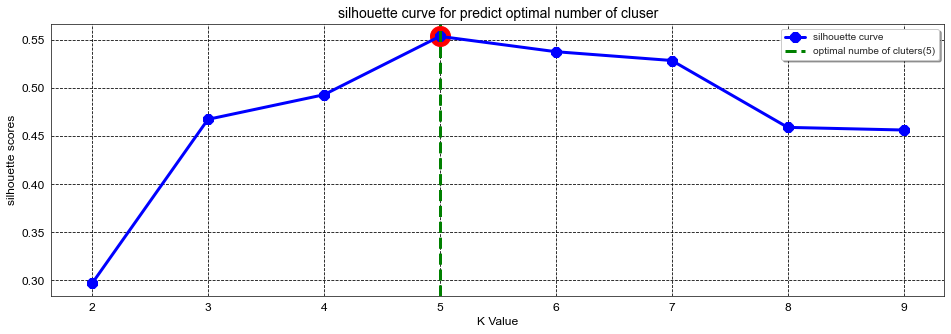

In [60]:
plt.figure(figsize=(16,5))    
plt.grid(which="major",color="black",linestyle='--')
plt.plot(range(2,10),silhouette_scores,"bo-",linewidth=3, color="blue", marker ="8", markersize=10,label='silhouette curve')
plt.title("silhouette curve for predict optimal number of cluser",family="Arial",fontsize=14,color="black")
plt.xlabel("K Value",family="Arial",fontsize=12,color="black")
plt.xticks(fontsize=12,color="black")
plt.yticks(fontsize=12,color="black")
plt.ylabel("silhouette scores",family="Arial",fontsize=12,color="black")
k = np.argmax(silhouette_scores) + 2
k
#calculate te optimal number of cluster 


#draw a vertcal line to mark opyimal number of clusters
plt.axvline(x=k ,linestyle='--',c='green',linewidth=3,label='optimal numbe of cluters({})'.format(k))
plt.scatter(k,silhouette_scores[k-2],c='red',s=400)
plt.legend(shadow=True)
plt.show()

In [74]:
#Model Build
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])

In [75]:
df['label']=clusters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


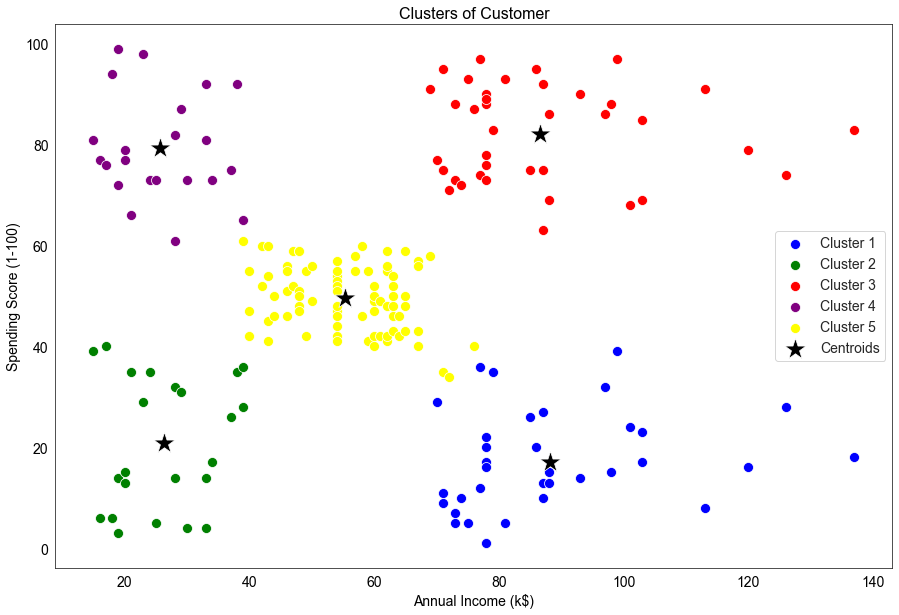

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_label0=df[df['label']==0]
df_label1=df[df['label']==1]
df_label2=df[df['label']==2]
df_label3=df[df['label']==3]
df_label4=df[df['label']==4]


fig=plt.figure(figsize=(15,10))

sns.scatterplot(x=df_label0["Annual Income (k$)"], y=df_label0["Spending Score (1-100)"], color='blue'  , s=100,label='Cluster 1')
sns.scatterplot(x=df_label1["Annual Income (k$)"], y=df_label1["Spending Score (1-100)"], color='green' , s=100,label='Cluster 2')
sns.scatterplot(x=df_label2["Annual Income (k$)"], y=df_label2["Spending Score (1-100)"], color='red'   , s=100,label='Cluster 3')
sns.scatterplot(x=df_label3["Annual Income (k$)"], y=df_label3["Spending Score (1-100)"], color='purple', s=100,label='Cluster 4')
sns.scatterplot(x=df_label4["Annual Income (k$)"], y=df_label4["Spending Score (1-100)"], color='yellow', s=100,label='Cluster 5')

sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color='black',s=500,label = 'Centroids')

plt.title('Clusters of Customer',fontsize=16,color="black")
plt.ylabel('Spending Score (1-100)',fontsize=14,color="black")
plt.xlabel("Annual Income (k$)",fontsize=14,color="black")
plt.xticks(fontsize=14,color="black")
plt.yticks(fontsize=14,color="black")
plt.legend(fontsize=14)
plt.show()
